In [1]:
# load train data
import tensorflow as tf
train_path = '/kaggle/input/intel-image-classification/seg_train/seg_train/'
test_path = '/kaggle/input/intel-image-classification/seg_test/seg_test/'
train_data = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=32,
label_mode='categorical')

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


2022-07-25 07:22:21.074990: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [2]:
# load validation data
val_data = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=32,
label_mode='categorical')

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [3]:
# load test data
test_data = test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  seed=123,
  image_size=(150, 150),
  batch_size=32,
label_mode='categorical')

Found 3000 files belonging to 6 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPool2D
model = Sequential()

In [5]:
# create model
model.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(150,150,3), padding='same', name='conv_1'))
model.add(MaxPool2D(pool_size=3))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, activation='relu', padding='same', name='conv_2'))
model.add(MaxPool2D(pool_size=3))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, activation='relu', padding='same', name='conv_3'))
model.add(MaxPool2D(pool_size=3))
model.add(Flatten())
model.add(Dense(128,activation='relu', name='dense_1'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax', name='dense_2'))
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 150, 150, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 16)        64        
_________________________________________________________________
conv_2 (Conv2D)              (None, 50, 50, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv_3 (Conv2D)              (None, 16, 16, 64)        5

In [6]:
# train model
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
early_stop = EarlyStopping(patience=5)
model_history = model.fit(train_data,epochs=30,validation_data=val_data,callbacks=[checkpoint,early_stop])

Epoch 1/30


2022-07-25 07:22:26.085932: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


351/351 [==============================] - 61s 171ms/step - loss: 1.0223 - accuracy: 0.6132 - val_loss: 0.7914 - val_accuracy: 0.6885
Epoch 2/30
351/351 [==============================] - 57s 161ms/step - loss: 0.7354 - accuracy: 0.7309 - val_loss: 1.2330 - val_accuracy: 0.6001
Epoch 3/30
351/351 [==============================] - 58s 164ms/step - loss: 0.6143 - accuracy: 0.7773 - val_loss: 0.5816 - val_accuracy: 0.7865
Epoch 4/30
351/351 [==============================] - 58s 165ms/step - loss: 0.5538 - accuracy: 0.8041 - val_loss: 0.4733 - val_accuracy: 0.8314
Epoch 5/30
351/351 [==============================] - 58s 163ms/step - loss: 0.4943 - accuracy: 0.8246 - val_loss: 0.6704 - val_accuracy: 0.7694
Epoch 6/30
351/351 [==============================] - 58s 164ms/step - loss: 0.4597 - accuracy: 0.8352 - val_loss: 0.5460 - val_accuracy: 0.8182
Epoch 7/30
351/351 [==============================] - 58s 164ms/step - loss: 0.4281 - accuracy: 0.8470 - val_loss: 1.1598 - val_accuracy: 0.6

In [7]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

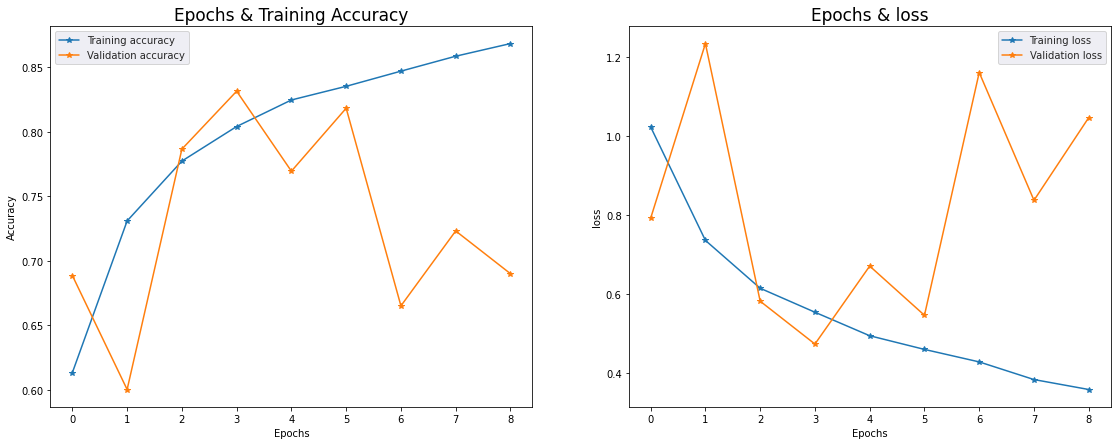

In [8]:
# plot loss and accuracy
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,7))
sns.set_style("darkgrid")

ax[0].plot(acc, '*-',label = 'Training accuracy')
ax[0].plot(val_acc, '*-',label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize = 17)
ax[0].legend(loc='best')


ax[1].plot(loss, '*-',label = 'Training loss')
ax[1].plot(val_loss, '*-',label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss', fontsize = 17)
ax[1].legend(loc='best')
sns.set_style("darkgrid")

In [9]:
# load best model
model.load_weights('weights.hdf5')
model.evaluate(test_data)

94/94 [==============================] - 6s 54ms/step - loss: 0.4941 - accuracy: 0.8230


[0.4941185712814331, 0.8230000138282776]